# Affective signals - I
----
<span style="color:Blue">**Through this notebook, we hope you get a hands-on approach to the explore different modalities that are used in multimodal analysis of human behaviour. 
    Below you will find code snippets and theory that will help you apply the libraries that will be introduced in the lecture.**</span>

----


In [1]:
import numpy as np
import pandas as pd

import subprocess
import time
import os

import matplotlib.pyplot as plt 

import re
import seaborn as sns

## Facial Expression
----
We tend to use facial expressions to communicate with each other and also express our emotional state. A facial expression is one or more motions or positions of the muscles beneath the skin of the face. These movements are believed to convey the emotional state of an individual to observers. Thus, facial expressions are one form of nonverbal communication.[source](https://en.wikipedia.org/wiki/Facial_expression)

----

### [OpenFace](https://github.com/TadasBaltrusaitis/OpenFace/wiki)

----
During the initial set up you should have already processed your videos using OpenFace. If you have not yet done so please refere to the [Readme]( https://github.com/mbp-lab/sose22_mbp_affective_signals/blob/master/README.md)(Extracting features using openface)

----
OpenFace creates a csv file that contains all features that have been extracted from the video. It should be present in the /Notebooks/processed/.
During the notebook you will use this generated csv to analyse your features.

A more detailed description of the features that are extracted can be found [here](https://github.com/TadasBaltrusaitis/OpenFace/wiki/Output-Format)

In [ ]:
#load the csv file using pandas
#change the path accordingly also remember that you are working within the container. 
#The path will ideally be /home/notebook/processed/<name-of-your-video>.csv
df = pd.read_csv("/home/Notebooks/processed/BA_zoom.csv")

In [ ]:
#First 5 rows of the dataframe(csv file)
df.head()

#### Action Units

Facial Action Coding System (FACS) is a system to taxonomize human facial movements by their appearance on the face. Movements of individual facial muscles are encoded by FACS from slight different instant changes in facial appearance. Using FACS it is possible to code nearly any anatomically possible facial expression, deconstructing it into the specific Action Units (AU) that produced the expression. It is a common standard to objectively describe facial expressions[[1]](https://github.com/TadasBaltrusaitis/OpenFace/wiki/Action-Units)

A List of all the Action units can be found [here](https://www.cs.cmu.edu/~face/facs.htm). You can find small animation of the action units here [here](https://imotions.com/blog/facial-action-coding-system/)


AUs can be described in two ways within the csv file 

    Presence - if AU is visible in the face (for example AU01_c)
    Intensity - how intense is the AU (minimal to maximal) on a 5 point scale ( for example AU01_r)

OpenFace provides both of these scores. For presence of AU 1 the column AU01_c in the output file would encode 0 as not present and 1 as present. For intensity of AU 1 the column AU01_r in the output file would range from 0 (not present), 1 (present at minimum intensity), 5 (present at maximum intensity), with continuous values in between.[source](https://github.com/TadasBaltrusaitis/OpenFace/wiki/Action-Units)

---
Let's look at the intensity plots of all the action units.

In [ ]:
#code adapted from https://towardsdatascience.com/how-to-extract-facial-expressions-head-pose-and-gaze-from-any-youtube-video-2aa6590c2bb6
# Threshold data by 80%
df_clean = df[df.confidence>=.80]
# Plot all Action Unit time series. 
au_regex_pat = re.compile(r'^AU[0-9]+_r$')
au_columns_r = df_clean.columns[df_clean.columns.str.contains(au_regex_pat)]
print("List of AU columns:", au_columns_r)
f,axes = plt.subplots(6, 3, figsize=(10,12), sharex=True, sharey=True)
axes = axes.flatten()
for au_ix, au_col in enumerate(au_columns_r):
    sns.lineplot(x='frame', y=au_col, hue='face_id', data=df_clean, ax=axes[au_ix])
    axes[au_ix].set(title=au_col, ylabel='Intensity')
    axes[au_ix].legend(loc=5)
plt.suptitle("AU intensity predictions", y=1.02)
plt.tight_layout()

In [ ]:
au_regex_pat = re.compile(r'^AU[0-9]+_c$')
au_columns = df_clean.columns[df_clean.columns.str.contains(au_regex_pat)]
print("List of AU columns:", au_columns)
f,axes = plt.subplots(6, 3, figsize=(10,12), sharex=True, sharey=True)
axes = axes.flatten()
for au_ix, au_col in enumerate(au_columns):
    sns.lineplot(x='frame', y=au_col, hue='face_id', data=df_clean, ax=axes[au_ix])
    axes[au_ix].set(title=au_col, ylabel="Presence")
    axes[au_ix].legend(loc=5)
plt.suptitle("AU occurence predictions", y=1.02)
plt.tight_layout()

----
We know that AU23 corresponds to a lip tightener.

![AU24.gif](AU24.gif)

[source](https://imotions.com/blog/facial-action-coding-system/)


Let's try to find out how many times you tightened your lips in the own video based on the AU23_c. Use the dataframe that we initialized above for this! 

#### Task 1.1: Count the number of times the action unit AU23 is present in your video and compare it for the different affective parts (seperated for the speaking and the listening part).

In [ ]:
###############################
#     your code goes here     #
###############################

#hint: use the dataframe to count the number of times AU23 occurs



AU12 and AU6 correspond to happiness, so let's see how many times do they co-occur in your video:

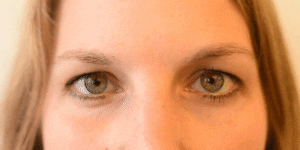
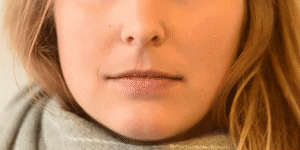

[source](https://imotions.com/blog/facial-action-coding-system/)

----

#### Task 1.2: Count the number of times the action units 12 and 6 are present simultaneously in your video and compare it for the different affective parts (seperated for the speaking and the listening part)


In [ ]:
###############################
#     your code goes here     #
###############################


#(hint: try to look at the columns AU12_c and AU06_c):





#### Task 1.3: Visualize the correlation of all the Action Units that are present based on their intensity. Do this task for the different affective parts (seperated for the speaking and the listening part)

In [ ]:
###############################
#     your code goes here     #
###############################

#hint: try to use AU_columns_r variables to get the required columns and find the correlation matrix from the dataframe):



# Plot the correlation using a heatmap 
# Hint: try using sns.heatmap(...)




-----
#### Task 1.4: Calculate the mean and variance for each of the Action Unit intensities. Compare it for the different affective parts (seperated for the speaking and the listening part)


In [ ]:
###############################
#     your code goes here     #
###############################





#### Task 1.5:  Verify the action units that are found using openface.

You can find a visual guide to all the action units [here](https://www.cs.cmu.edu/~face/facs.htm) and [here](https://imotions.com/blog/facial-action-coding-system/)

OpenFace is able to recognize a subset of AUs, specifically: 1, 2, 4, 5, 6, 7, 9, 10, 12, 14, 15, 17, 20, 23, 25, 26, 28, and 45.

In the following cells, you can use the interactive slider to scroll through your video and find a frame that you find has multiple action units present. 

Once you have found such a frame you can select "True" in the save drop down widget.This will save the current frame as /home/Notebooks/processed/frame<font color="red">%frame_number%</font>.jpg. (This is still within the docker container, but you should also have a copy present on your local system)

In [ ]:
import cv2
from IPython.display import Image
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

# update the video path here accordingly, please be aware you are working within a docker container so the proccesed 
# folder will be present in /home/Notebooks/processed/ 
videoPath = "/home/Notebooks/processed/BA_zoom.mp4"

@interact(frame=(min(df_clean.frame),max(df_clean.frame)),videoPath=videoPath, save=[False,True])
def disp_frame(frame, videoPath, save):
    '''Display a frame that is controlled by the slider and also save a frame by selecting True from the dropdown'''
    vidcap = cv2.VideoCapture(videoPath)
    success, image = vidcap.read()
    if not success:
        print("Path to video might be wrong!")
    while success:
        frameId = int(round(vidcap.get(1))) #current frame number, rounded b/c sometimes you get frame intervals which aren't integers...this adds a little imprecision but is likely good enough
        success, image = vidcap.read()
        if frameId == frame:
            img1 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            plt.imshow(img1) 
            plt.axis("off")
            if save:
                cv2.imwrite("/home/Notebooks/processed/frame%d.jpg" % frameId, image)
    vidcap.release()
    print("Complete")

Now that you have a image that you want to analyze, try to refer the visual guides mentioned above to find what action units are present in your image. 

In the next cell you will try to find out what action units that were extracted using openface. 

In [ ]:
# use the dataframe you loaded to find the corresponding frame and extract all the action units


####################################
#    Your code goes here           #
####################################







#### Write a short note on what you observe: 
* Are the Facial action units classified accurately, which action unit can you observe that is not extracted by openface

#### Bonus Task
* You can try to not just look at the presence but also the intensities of the action units and describe what you observe

Your analysis goes here: 

In [ ]:
##########################
#  your code goes here   #
##########################








#### Task 1.6 Histogram of oriented gradients

In [ ]:
from skimage.feature import hog
from skimage import io

#load the image, change the path accordingly to match the frame that you have saved 
image_path = "../Notebooks/processed/frame180.jpg"
img = io.imread(image_path)
plt.imshow(img)
plt.show()

###############################
#     your code goes here     #
###############################
# You can extract the hog features using skimage.feature.hog
# or you can code the extractor manually . Heres a guide to help you do it(https://learnopencv.com/histogram-of-oriented-gradients/)


# display the feature extracted




#### Task 1.7 Can you think of other features that you could extract from your image:

In [ ]:
###############################
#     your code goes here     #
###############################





#### Bonus Task: Add the facial landmark on to the image.
* you can find the facial landmarks locations within the dataframe
* x_0, x_1, ... x_66, x_67, y_0,...y_67 location of 2D landmarks in pixels, the landmark index can be seen below

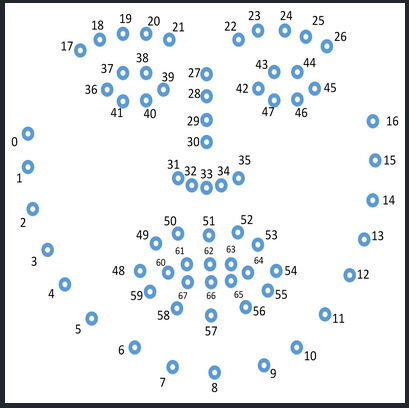

[source](https://github.com/TadasBaltrusaitis/OpenFace/wiki/Output-Format)

In [ ]:
###############################
#     your code goes here     #
###############################






If you are interested, try out additional analyses and visualizations to explore your individual facial expressions in the video. For example, try to find out how much you're smiling in your video. We can discuss your findings and ideas in the upcoming tutorial !

#### References:

    OpenFace 2.0: Facial Behavior Analysis Toolkit Tadas Baltrušaitis, Amir Zadeh, Yao Chong Lim, and Louis-Philippe Morency, IEEE International Conference on Automatic Face and Gesture Recognition, 2018

    Facial landmark detection and tracking

    Convolutional experts constrained local model for facial landmark detection A. Zadeh, T. Baltrušaitis, and Louis-Philippe Morency. Computer Vision and Pattern Recognition Workshops, 2017

    Constrained Local Neural Fields for robust facial landmark detection in the wild Tadas Baltrušaitis, Peter Robinson, and Louis-Philippe Morency. in IEEE Int. Conference on Computer Vision Workshops, 300 Faces in-the-Wild Challenge, 2013.
    Eye gaze tracking

    Rendering of Eyes for Eye-Shape Registration and Gaze Estimation Erroll Wood, Tadas Baltrušaitis, Xucong Zhang, Yusuke Sugano, Peter Robinson, and Andreas Bulling in IEEE International. Conference on Computer Vision (ICCV), 2015

    Facial Action Unit detection

    Cross-dataset learning and person-specific normalisation for automatic Action Unit detection Tadas Baltrušaitis, Marwa Mahmoud, and Peter Robinson in Facial Expression Recognition and Analysis Challenge, IEEE International Conference on Automatic Face and Gesture Recognition, 2015